# **Predicted Rate Equation :**
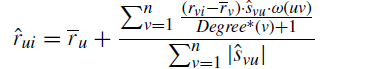



> What are The Symbols ?.....



```
1) Suv -> UBP Similarity Between User u and v  .
2) Rv -> is the average rating given by user v .
3) Ru -> is the average rating given by user u .
4) Degree*(v) -> is the normalized degree of user v in the modeled user-user similarity network .
5) w(uv) is the community parameter and is defined as follow :

```
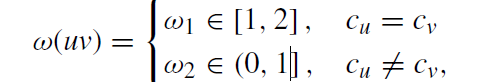






```
which is used to adjust the impact of neighbors, making
neighbors in the same community more critical, and neighbors
in other communities less critical in the rating prediction.
Respectively, cu and cv stands for user u's and user v's community,
labeled by a community detection algorithm [68].
In our work, we selected !1 D 1:0 and !2 D 0:7 by
experiments, which is omitted in the paper for the sake of
clarity.
```




In [1]:
import numpy as np
import pandas as pd

In [4]:
# 1

model_filename = 'drive/MyDrive/Dataset2/SimilarityOfUsers.csv'
Suv = pd.read_csv(model_filename)

Suv = Suv.clip(upper=1.0)
Suv = Suv.applymap(lambda x: max(0, x))
Suv = Suv.applymap(lambda x: x if x >= 0.4 else float(0.0))

Suv.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,1.000000,0.0,0.0,0.516196,0.0,0.0,0.540215,0.0,0.0,0.0,...,0.0,0.480139,0.651735,0.000000,0.436931,0.00000,1.0,1.00000,0.000000,0.410598
1,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000
2,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000
3,0.516196,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.88533,0.0,0.47253,0.000000,0.000000
4,0.000000,0.0,0.0,0.000000,1.0,1.0,0.000000,1.0,0.0,0.0,...,0.0,1.000000,0.000000,0.724984,0.000000,0.00000,0.0,0.00000,0.526469,0.000000


In [5]:
# Example: Retrieve the value at row 0, column 0 using column names
Suv_value = Suv.iloc[3, 3]
print("Suv Value Selected :", Suv_value)


Suv Value Selected : 1.0


In [6]:
# Filter similar user IDs for a specified user ID
def get_similar_user_ids(user_id, threshold=0.8):
    # Filter the DataFrame to get similarity values for the specified user ID
    similarities_to_user = Suv[user_id]

    # Filter similar user IDs with similarity >= threshold
    similar_user_ids = similarities_to_user[similarities_to_user >= threshold].index.tolist()

    # Remove the specified user ID from the list if it's present
    similar_user_ids.remove(user_id) if user_id in similar_user_ids else None

    return similar_user_ids


In [7]:
# Method to create a dictionary of movie ratings by similar users
def create_movie_ratings_dict(user_ids):
    movie_ratings = {}
    for similar_user_id in user_ids:
        # Filter ratings made by the similar user
        similar_user_ratings = ratings[(ratings['userId'] == similar_user_id)]

        # Store movie ratings in the dictionary
        for _, row in similar_user_ratings.iterrows():
            movie_id = row['movieId']
            rating = row['rating']

            if movie_id not in movie_ratings:
                movie_ratings[movie_id] = []

            movie_ratings[movie_id].append(rating)

    return movie_ratings

In [8]:
ratings = pd.read_csv("drive/MyDrive/Dataset2/ratings.csv")
ratings = ratings[['userId', 'movieId', 'rating']]
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [9]:
# Prompt the user to enter the user ID
user_id = input("Enter the user ID: ")

# Check if the entered user ID exists in the DataFrame
if user_id not in Suv.columns:
    print("User ID not found!")
else:
    # Get similar user IDs for the specified user ID
    similar_user_ids = get_similar_user_ids(user_id)

    # Display similar user IDs
    print("User ID:", user_id)
    print("Similar User IDs:", similar_user_ids)

Enter the user ID: 5
User ID: 5
Similar User IDs: [4, 5, 7, 32, 37, 39, 42, 45, 53, 57, 83, 93, 101, 106, 108, 116, 120, 125, 129, 132, 133, 141, 143, 144, 161, 169, 172, 173, 178, 190, 228, 234, 239, 241, 261, 272, 313, 322, 346, 348, 352, 371, 372, 378, 384, 393, 403, 410, 435, 443, 445, 446, 454, 457, 467, 469, 475, 497, 506, 511, 540, 558, 564, 565, 573, 583, 587, 591, 601]


In [10]:

# Check if the entered user ID exists in the DataFrame
if user_id not in Suv.columns:
    print("User ID not found!")
else:

    # Prompt the user to specify the number of similar user IDs to display
    n = int(input("Enter the number of similar user IDs to display: "))

    # Check if the specified number is greater than the number of similar user IDs found
    if n > len(similar_user_ids):
        print(f"Only {len(similar_user_ids)} similar user IDs found. Displaying all.")

    # Display similar user IDs
    print("User ID:", user_id)
    n_users_from_similar_users = similar_user_ids[:n]
    print(f"Similar User IDs (Top {n}):", n_users_from_similar_users)


Enter the number of similar user IDs to display: 3
User ID: 5
Similar User IDs (Top 3): [4, 5, 7]


In [11]:
# Check if the entered user ID exists in the DataFrame
if user_id not in Suv.columns:
    print("User ID not found!")
else:
    # Create the movie ratings dictionary
    movie_ratings_dict = create_movie_ratings_dict(n_users_from_similar_users)

    # Display the movie ratings dictionary
    print("Movie Ratings by Similar Users:")
    for movie_id, ratings_list in movie_ratings_dict.items():
        print("Movie ID:", int(movie_id))
        print("Ratings:", ratings_list)
        print()

Movie Ratings by Similar Users:
Movie ID: 21
Ratings: [3.0, 4.0]

Movie ID: 32
Ratings: [2.0]

Movie ID: 45
Ratings: [3.0]

Movie ID: 47
Ratings: [2.0]

Movie ID: 52
Ratings: [3.0]

Movie ID: 58
Ratings: [3.0, 5.0, 3.0]

Movie ID: 106
Ratings: [4.0]

Movie ID: 125
Ratings: [5.0]

Movie ID: 126
Ratings: [1.0]

Movie ID: 162
Ratings: [5.0]

Movie ID: 171
Ratings: [3.0]

Movie ID: 176
Ratings: [5.0]

Movie ID: 190
Ratings: [2.0]

Movie ID: 215
Ratings: [5.0]

Movie ID: 222
Ratings: [1.0]

Movie ID: 232
Ratings: [5.0, 4.0]

Movie ID: 235
Ratings: [2.0]

Movie ID: 247
Ratings: [3.0, 5.0]

Movie ID: 260
Ratings: [5.0, 5.0]

Movie ID: 265
Ratings: [5.0, 3.0]

Movie ID: 296
Ratings: [1.0, 5.0]

Movie ID: 319
Ratings: [5.0]

Movie ID: 342
Ratings: [5.0]

Movie ID: 345
Ratings: [4.0]

Movie ID: 348
Ratings: [4.0]

Movie ID: 351
Ratings: [3.0]

Movie ID: 357
Ratings: [3.0, 2.0]

Movie ID: 368
Ratings: [4.0]

Movie ID: 417
Ratings: [2.0]

Movie ID: 441
Ratings: [1.0]

Movie ID: 450
Ratings: [2.0]


In [30]:
print("MMM :", movie_ratings_dict[32296])

MMM : [2.0]


In [41]:
movie = pd.read_csv("drive/MyDrive/Dataset2/movies.csv")
movie = movie[['movieId', 'title']]
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
# Example: Select the rating value for a specific user ID and movie ID

user_id = 1
movie_id = 50

# Filter the DataFrame based on the user ID and movie ID
selected_rating = ratings[(ratings['userId'] == user_id) & (ratings['movieId'] == movie_id)]['rating'].values

if len(selected_rating) > 0:
    print("Rating value for user", user_id, "and movie", movie_id, ":", selected_rating[0])
else:
    print("No rating found for user", user_id, "and movie", movie_id)

Rating value for user 1 and movie 50 : 5.0


In [8]:
# 2 & 3

mean_ratings_by_user = ratings.groupby('userId')['rating'].mean().reset_index()
mean_ratings_by_user.head(10)

,userId,rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364
5,6,3.493631
6,7,3.230263
7,8,3.574468
8,9,3.260870
9,10,3.278571


In [9]:
user_id_avg = 10
# Filter the DataFrame based on the user ID and movie ID
selected_mean_rating = mean_ratings_by_user[(mean_ratings_by_user['userId'] == user_id_avg) ]['rating'].values

if len(selected_rating) > 0:
    print("Avarage rating value for user", user_id,  ":", selected_mean_rating[0])
else:
    print("No avarage rating found for user", user_id)

Avarage rating value for user 1 : 3.2785714285714285


In [10]:
# 4
cluster_user = pd.read_csv("drive/MyDrive/Dataset2/ClustersUsers.csv")
cluster_user.head()

,Cluster No.,Similar Users Count
0,1,6
1,2,67
2,3,35
3,4,10
4,5,40


In [11]:
# 5
def w(cu, cv):
    param1 = 1
    param2 = 0.7
    if cu == cv:
        return param1
    else:
        return param2

In [12]:
def degree(no_of_cluster1, no_of_cluster2):
    result =  no_of_cluster1 / no_of_cluster2
    return result

In [13]:

# Step 5: Define the prediction function using the provided equation
def predict_rating(ru, rv, rvi, Suv, degree_v, n_nearest_users, cu, cv):

    sum_weights = 0
    sum_rating_diff_weighted = 0

    for v in range(1, n_nearest_users + 1):
        weight = (rvi - rv) * Suv * w(cu, cv)
        sum_rating_diff_weighted += weight
        sum_weights += (degree_v + 1) * abs(Suv)

    if sum_weights == 0:
        return 0  # Avoid division by zero

    predicted_rating = ru + (sum_rating_diff_weighted / sum_weights)
    return predicted_rating


# predicted_the_rating = predict_rating(ru, rv,rvi, osvu, degree_v, n_nearest_users, cu, cv)
# print("Predicted rating:", predicted_the_rating)
